<a href="https://colab.research.google.com/github/akarshpyr/Python-codes/blob/main/SVM_forest_fire_upd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('/content/forestfires.csv')

In [3]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df = df.drop(['month','day'],axis=1)

In [5]:
df.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [6]:
df.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [7]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.loc[df['size_category']=='small','size_category']=0
df.loc[df['size_category']=='large','size_category']=1

In [9]:
df.size_category.value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [10]:
def norm(i):
  x= (i-i.min())/(i.min()-i.max())
  return(x)

In [11]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df = df.astype(float)

In [13]:
pred = df.iloc[:,0:28]
target = df.iloc[:,28]

In [14]:
df['size_category'].value_counts()

0.0    378
1.0    139
Name: size_category, dtype: int64

In [15]:
pred_n = norm(pred)

In [16]:
pred_n

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.870968,-0.086492,-0.101325,-0.090909,-0.192926,-0.423529,-0.700000,-0.00000,-0.000000,-1.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0
1,-0.927742,-0.118194,-0.775419,-0.119430,-0.508039,-0.211765,-0.055556,-0.00000,-0.000000,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0
2,-0.927742,-0.146795,-0.796294,-0.119430,-0.398714,-0.211765,-0.100000,-0.00000,-0.000000,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0
3,-0.941935,-0.110958,-0.081623,-0.160428,-0.196141,-0.964706,-0.400000,-0.03125,-0.000000,-1.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0
4,-0.910968,-0.172984,-0.110590,-0.171123,-0.295820,-0.988235,-0.155556,-0.00000,-0.000000,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.811613,-0.191592,-0.771315,-0.033868,-0.823151,-0.200000,-0.255556,-0.00000,-0.005904,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
513,-0.811613,-0.191592,-0.771315,-0.033868,-0.633441,-0.658824,-0.600000,-0.00000,-0.049769,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
514,-0.811613,-0.191592,-0.771315,-0.033868,-0.610932,-0.647059,-0.700000,-0.00000,-0.010231,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
515,-0.976774,-0.499311,-0.711622,-0.201426,-0.752412,-0.317647,-0.400000,-0.00000,-0.000000,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [17]:
target 

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
512    1.0
513    1.0
514    1.0
515    0.0
516    0.0
Name: size_category, Length: 517, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(pred_n,target,test_size=0.3,random_state=8,stratify=target)

In [20]:
x_train

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
87,-0.957419,-0.468298,-0.819163,-0.163993,-0.649518,-0.223529,-0.200000,-0.00000,-0.000000,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0
69,-0.941935,-0.110958,-0.081623,-0.160428,-0.482315,-0.129412,-0.455556,-0.00000,-0.000000,-1.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0
210,-0.927742,-0.146795,-0.796294,-0.119430,-0.520900,-0.117647,-0.300000,-0.00000,-0.022212,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0
335,-0.940645,-0.369745,-0.886713,-0.110517,-0.244373,-0.835294,-0.155556,-0.00000,-0.000000,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0
381,-0.929032,-0.665059,-0.744811,-0.121212,-0.450161,-0.564706,-0.255556,-0.00000,-0.014970,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,-0.935484,-0.162646,-0.105430,-0.222816,-0.398714,-0.129412,-1.000000,-0.00000,-0.002319,-1.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0
485,-0.984516,-0.463129,-0.690043,-0.379679,-0.913183,-0.152941,-0.355556,-0.00000,-0.001898,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
296,-0.925161,-0.304618,-0.331770,-0.114082,-0.389068,-0.364706,-0.155556,-0.00000,-0.000825,-0.0,...,-0.0,-0.0,-0.0,-0.0,-1.0,-0.0,-0.0,-0.0,-0.0,-0.0
243,-0.943226,-0.599586,-0.812478,-0.245989,-0.633441,-0.682353,-0.800000,-0.15625,-0.000000,-0.0,...,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [21]:
y_test

322    0.0
203    1.0
453    0.0
419    0.0
43     0.0
      ... 
311    1.0
6      0.0
497    1.0
74     0.0
234    1.0
Name: size_category, Length: 156, dtype: float64

In [22]:
y_train

87     0.0
69     0.0
210    1.0
335    0.0
381    1.0
      ... 
168    0.0
485    0.0
296    0.0
243    0.0
342    0.0
Name: size_category, Length: 361, dtype: float64

In [23]:
model1 = SVC(kernel='linear',probability=True)
model1.fit(x_train,y_train)
model2 = SVC(kernel='poly',probability=True)
model2.fit(x_train,y_train)
model3 = SVC(kernel='rbf',probability=True)
model3.fit(x_train,y_train)
model4 = SVC(kernel='sigmoid',probability=True)
model4.fit(x_train,y_train)

SVC(kernel='sigmoid', probability=True)

In [24]:
y_pred1 = model1.predict(x_test)
y_pred2 = model2.predict(x_test)
y_pred3 = model3.predict(x_test)
y_pred4 = model4.predict(x_test)

In [25]:
y_pred1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [28]:
accu1 = np.mean(y_pred1==y_test)
accu2 = np.mean(y_pred2==y_test)
accu3 = np.mean(y_pred3==y_test)
accu4 = np.mean(y_pred4==y_test)

In [29]:
print(f'the accuracy scores for linear,poly,rbf and sigmoid respectively are {accu1} {accu2} {accu3} {accu4}')

the accuracy scores for linear,poly,rbf and sigmoid respectively are 0.7371794871794872 0.7435897435897436 0.7435897435897436 0.7371794871794872


In [30]:
accu_df = {'Kernel':['linear','poly','rbf','sigmoid'],'Accuracy':[accu1,accu2,accu3,accu4]}

In [31]:
accu_df = pd.DataFrame(accu_df)

In [32]:
accu_df

,Kernel,Accuracy
0,linear,0.737179
1,poly,0.743590
2,rbf,0.743590
3,sigmoid,0.737179


In [33]:
from sklearn.metrics import confusion_matrix, roc_auc_score,roc_curve

In [34]:
fpr,tpr,thresholds = roc_curve(y_test, model1.predict_proba(x_test)[:,1])

In [35]:
fpr1,tpr1,thresholds1 = roc_curve(y_test, model2.predict_proba(x_test)[:,1])
fpr2,tpr2,thresholds2 = roc_curve(y_test, model3.predict_proba(x_test)[:,1])
fpr3,tpr3,thresholds3 = roc_curve(y_test, model4.predict_proba(x_test)[:,1])

In [36]:
import matplotlib.pyplot as plt


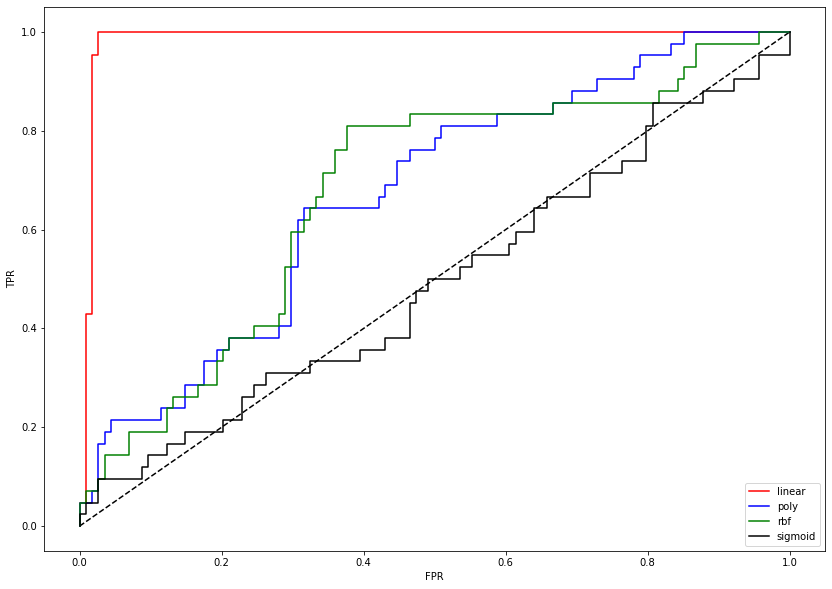

In [37]:
plt.figure(figsize=(14,10))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,color='red',label='linear')
plt.plot(fpr1,tpr1,color='blue',label='poly')
plt.plot(fpr2,tpr2,color='green',label='rbf')
plt.plot(fpr3,tpr3,color='black',label='sigmoid')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [38]:
auc1 = roc_auc_score(y_test, model1.predict_proba(x_test)[:,1])

In [39]:
auc1

0.9862155388471179

In [40]:
auc2 = roc_auc_score(y_test, model2.predict_proba(x_test)[:,1])
auc3 = roc_auc_score(y_test, model3.predict_proba(x_test)[:,1])
auc4= roc_auc_score(y_test, model4.predict_proba(x_test)[:,1])

In [41]:
print(f'The auc score for Poly , rbf and Sigmoid is {auc2} {auc3} and {auc4} respectively')

The auc score for Poly , rbf and Sigmoid is 0.6706349206349207 0.6754385964912281 and 0.4914369256474519 respectively


The SVC linear model is the best model